In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Define the regression function
def reg(x):
    return 5 * np.sin(x) + 23 * (np.cos(x))**2

In [3]:
class StepFunction:
    def __init__(self, x, y):
        """
        Initialize with breakpoints `x` and values `y`.
        `x` should have length k+1 and `y` should have length k.
        """
        if len(y) != len(x) - 1:
            raise ValueError("Length of y must be one less than length of x")
        self.x = x
        self.y = y

    def predict(self, z):
        # Predict step function value at z (scalar or array).
        z = np.asarray(z)
        result = np.zeros_like(z, dtype=float)
        for i in range(len(self.y)):
            result[(z >= self.x[i]) & (z < self.x[i + 1])] = self.y[i]
        return result

In [5]:
def Bin_smoothing(k, X, Y):
    
    x_train = np.array(X[:80]); y_train = np.array(Y[:80])
    x_test = np.array(X[80:]); y_test = np.array(Y[80:])

    # Bin edges
    BI = np.linspace(5, 15, k + 1)
    Means = []

    for j in range(k):
        indices = np.where((x_train > BI[j]) & (x_train <= BI[j+1]))[0]
        m = np.mean(y_train[indices]) if len(indices) > 0 else 0
        Means.append(m)

    sf = StepFunction(BI, Means)

    # Compute test and train errors
    err_Train = np.mean((y_train - sf.predict(x_train))**2)
    err_Test = np.mean((y_test - sf.predict(x_test))**2)
    
    return err_Train, err_Test

In [7]:
np.random.seed(42)
k = 5
Res = []
R = 50

for r in range(R):
    X = np.random.uniform(5, 15, 100)
    Y = reg(X) + np.random.normal(0, 5, 100)

    a,b = Bin_smoothing(k=k, X=X, Y=Y)
    Res.append([a,b])
    
print(np.mean(Res, axis=0))
pd.DataFrame([np.mean(Res, axis=0)], columns=['Avg Train error', 'Avg Test error'])

[ 87.49321986 101.15910215]


,Avg Train error,Avg Test error
0,87.49322,101.159102


### Repeat the procedure $50$ times and report the avg MSE for various $k$, for Train and test data

In [ ]:
# For several values of k we will compute avg training and test error
K = [5,10,15,20,25,30,35,40,45,50]
Res = []
R = 50 # Repeat the procedure 50 times

for r in range(R):
    np.random.seed(r)
    # Simulating different data sets over different replication
    X = np.random.uniform(5, 15, 100)
    Y = reg(X) + np.random.normal(0, 5, 100)
    
    errs = []
    # compute the errors for different number of bins
    for k in K:
        a,b = Bin_smoothing(k=k, X=X, Y=Y)
        errs.append([a,b])

    Res.append(errs)
# making a data frame of the results    
Res_df = pd.DataFrame(np.mean(Res, axis=0), columns=['Avg Train error', 'Avg Test error'])
Res_df.insert(loc=0, column='k', value=K)
Res_df

,k,Avg Train error,Avg Test error
0,5,84.211889,100.743595
1,10,39.246268,52.180129
2,15,28.405308,44.949910
3,20,22.926342,43.928269
4,25,20.483240,46.515641
5,30,17.997088,56.330722
6,35,16.055503,61.769775
7,40,14.945532,64.972646
8,45,13.892982,79.562359
9,50,12.976618,79.827617


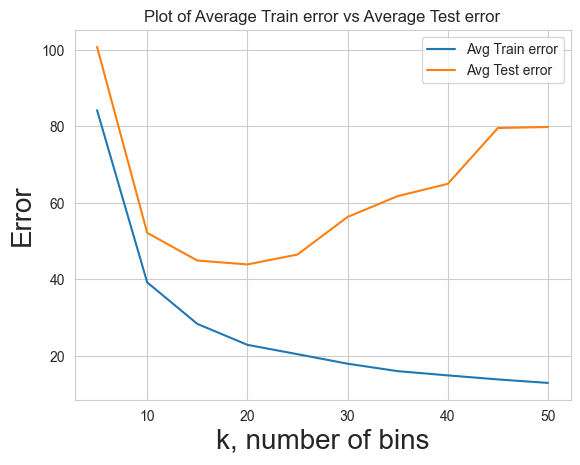

In [24]:
plt.plot(Res_df['k'], Res_df['Avg Train error'],label='Avg Train error')
plt.plot(Res_df['k'], Res_df['Avg Test error'],label='Avg Test error')
plt.xlabel('k, number of bins', fontsize=20); plt.ylabel('Error', fontsize = 20)
plt.title('Plot of Average Train error vs Average Test error')
plt.legend()